# Hubert Stefanski -- 20081102@mail.wit.ie -- Text-Mining -- CA

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

plt.style.use("seaborn-darkgrid")

SEED = 666


## Load Dataset and Cleanup

In [2]:
df = pd.read_csv("data/wapo_trumpclaims_export-012021.csv.gz")
print(df.shape)
df.head(2)

(30573, 9)


,id,location,claim,analysis,pinocchios,category,repeated_ids,repeated_count,date
0,31608.0,Remarks,"“We also got tax cuts, the largest tax cut and...","This is Trump’s second favorite falsehood, and...",4.0,Taxes,"31608, 31581, 31305, 31183, 31530, 30920, 3085...",296,01/20/2021
1,31609.0,Remarks,“We just got seventy five million votes. And t...,"When the counting was finished, Trump had rece...",NaN,Election,"31609, 31292, 31155, 31016, 31082, 30992, 3156...",19,01/20/2021


In [3]:
df.category.value_counts(dropna=False)

Immigration            3225
Foreign policy         3165
Election               3037
Miscellaneous          2767
Coronavirus            2521
Trade                  2513
Economy                2475
Russia                 1838
Jobs                   1732
Health care            1629
Ukraine probe          1377
Environment            1065
Biographical record     963
Taxes                   857
Crime                   852
NaN                     169
Guns                    165
Education               151
Terrorism                72
Name: category, dtype: int64

In [4]:
df.dropna(subset=['category'], inplace=True)
print(df.shape)

(30404, 9)


In [5]:
df.location.value_counts(dropna=False)

Campaign rally       9514
Remarks              6207
Interview            4971
Twitter              4703
Speech               2763
News conference      1895
Vlog                  148
Statement             123
Leaked transcript      80
Name: location, dtype: int64

In [6]:
# sns.histplot(x='date',data=df) // COMMENTED OUT DUE TO VERSION ISSUE

In [7]:
criteria = df.category.isin(["Immigration","Coronavirus"])
df = df.loc[criteria, ["claim","category"]].copy()
df.shape

(5746, 2)

In [8]:
df.category.value_counts()

Immigration    3225
Coronavirus    2521
Name: category, dtype: int64

## Feature Engineering

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['claim'], df.category, test_size=0.4, stratify = df.category ,random_state=SEED)

(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

((3447,), (3447,), (2299,), (2299,))

In [10]:
# df_train, df_test = train_test_split(df, test_size=0.4, stratify = df.category ,random_state=SEED)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(1,2))

In [12]:
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

X_train_counts.shape

(3447, 43639)

In [13]:
print(list(count_vectorizer.get_feature_names()[:100]))

['000', '000 000', '000 175', '000 70', '000 adults', '000 aliens', '000 americans', '000 and', '000 apprehensions', '000 arrests', '000 as', '000 assaults', '000 beds', '000 black', '000 burglaries', '000 burglary', '000 but', '000 car', '000 cases', '000 coronavirus', '000 could', '000 crimes', '000 criminal', '000 criminals', '000 daca', '000 damage', '000 day', '000 deaths', '000 for', '000 fraudulent', '000 gang', '000 had', '000 hospital', '000 how', '000 illegal', '000 in', '000 including', '000 instead', '000 it', '000 judges', '000 kidnappings', '000 larcenies', '000 last', '000 lives', '000 mexican', '000 mexico', '000 migrant', '000 mile', '000 miles', '000 minors', '000 more', '000 multiply', '000 murderers', '000 murders', '000 nursing', '000 of', '000 on', '000 patients', '000 people', '000 per', '000 percent', '000 plus', '000 pounds', '000 robberies', '000 rooms', '000 sex', '000 sexual', '000 small', '000 so', '000 soldiers', '000 some', '000 tests', '000 that', '000 t

## Model Building

In [24]:
# model = MultinomialNB()
model = LogisticRegression(max_iter=1000)


AttributeError: 'dict' object has no attribute 'fit'

In [15]:
model.fit(X_train_counts,y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(X_test_counts)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=True,digits=4))

              precision    recall  f1-score   support

 Coronavirus     0.9461    0.9732    0.9595      1009
 Immigration     0.9786    0.9566    0.9675      1290

    accuracy                         0.9639      2299
   macro avg     0.9623    0.9649    0.9635      2299
weighted avg     0.9643    0.9639    0.9639      2299



In [18]:
df_cm = pd.crosstab(y_test,y_pred)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm

Predicted,Coronavirus,Immigration
Actual,,
Coronavirus,982,27
Immigration,56,1234


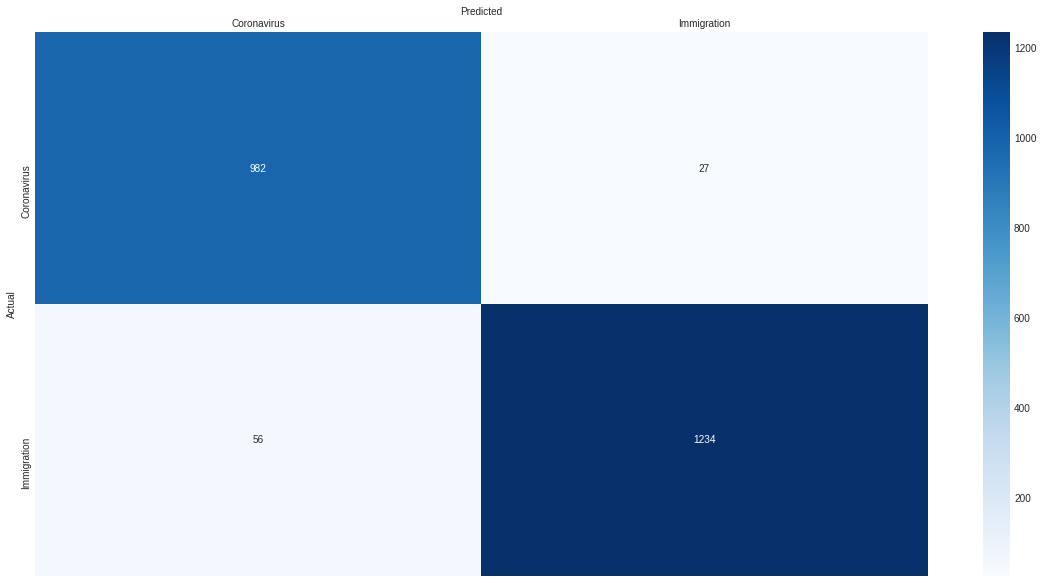

In [19]:
plt.figure(figsize=(20,10))
g = sns.heatmap(df_cm,annot=True,fmt="d",cmap="Blues")
g.xaxis.set_ticks_position('top')
g.xaxis.set_label_position('top')

In [20]:
print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

 Coronavirus     0.9461    0.9732    0.9595      1009
 Immigration     0.9786    0.9566    0.9675      1290

    accuracy                         0.9639      2299
   macro avg     0.9623    0.9649    0.9635      2299
weighted avg     0.9643    0.9639    0.9639      2299

